In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/business analytics Python

/content/drive/MyDrive/business analytics Python


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv("CreditCard.csv")

In [ ]:
#Q1
print(f"DataFrame dimensions: {df.shape}")
print("Data description")
print(df.describe())
print("Missing values by columns")
print(df.isnull().sum())

DataFrame dimensions: (1319, 12)
Data description
           reports          age       income        share  expenditure  \
count  1319.000000  1319.000000  1319.000000  1319.000000  1319.000000   
mean      0.456406    33.213103     3.365376     0.068732   185.057071   
std       1.345267    10.142783     1.693902     0.094656   272.218917   
min       0.000000     0.166667     0.210000     0.000109     0.000000   
25%       0.000000    25.416670     2.243750     0.002316     4.583333   
50%       0.000000    31.250000     2.900000     0.038827   101.298300   
75%       0.000000    39.416670     4.000000     0.093617   249.035800   
max      14.000000    83.500000    13.500000     0.906320  3099.505000   

        dependents       months   majorcards       active  
count  1319.000000  1319.000000  1319.000000  1319.000000  
mean      0.993935    55.267627     0.817286     6.996967  
std       1.247745    66.271746     0.386579     6.305812  
min       0.000000     0.000000     0.00000

In [ ]:
#Q2
categorical_columns = ["card","owner","selfemp"]
df[categorical_columns] = df[categorical_columns].replace({"yes":1,"no":0})
print(df.head())

   card  reports       age  income     share  expenditure  owner  selfemp  \
0     1        0  37.66667  4.5200  0.033270   124.983300      1        0   
1     1        0  33.25000  2.4200  0.005217     9.854167      0        0   
2     1        0  33.66667  4.5000  0.004156    15.000000      1        0   
3     1        0  30.50000  2.5400  0.065214   137.869200      0        0   
4     1        0  32.16667  9.7867  0.067051   546.503300      1        0   

   dependents  months  majorcards  active  
0           3      54           1      12  
1           3      34           1      13  
2           4      58           1       5  
3           0      25           1       7  
4           2      64           1       5  


<ipython-input-6-5a131c86d060>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[categorical_columns] = df[categorical_columns].replace({"yes":1,"no":0})


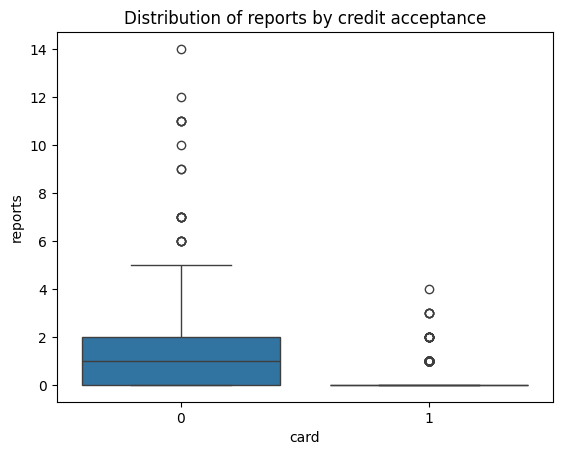

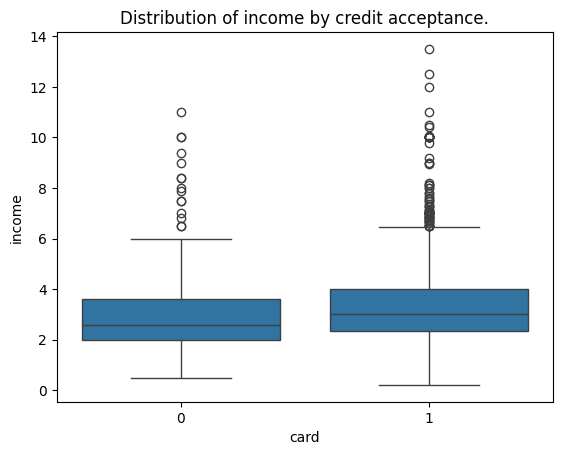

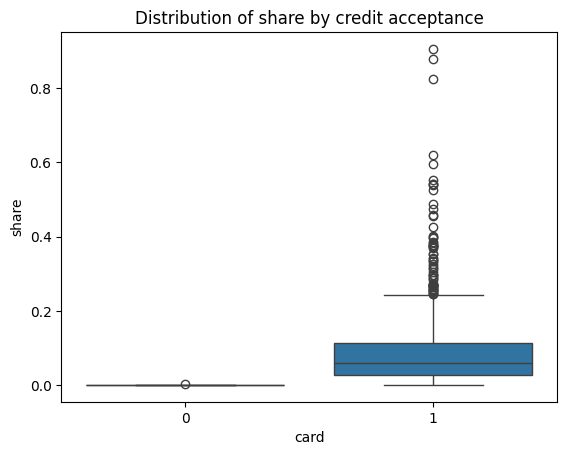

In [ ]:
#Q3
sns.boxplot(x='card', y='reports', data=df)
plt.title('Distribution of reports by credit acceptance')
plt.show()

sns.boxplot(x='card', y='income', data=df)
plt.title('Distribution of income by credit acceptance.')
plt.show()

sns.boxplot(x='card', y='share', data=df)
plt.title('Distribution of share by credit acceptance')
plt.show()

<ipython-input-8-9a6c3027b45c>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acceptance_rate_by_income = df_visual.groupby('income_bins')['card'].mean() * 100


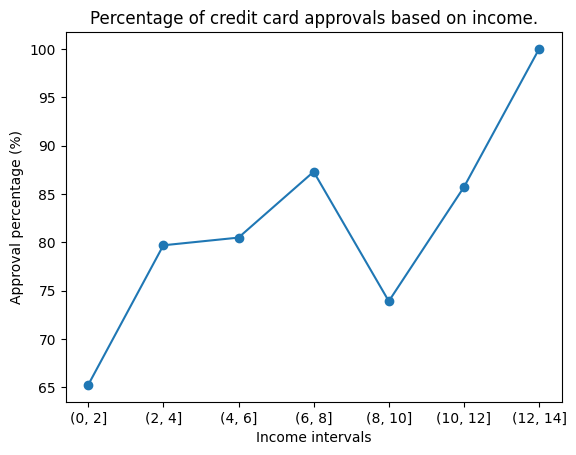

In [ ]:
df_visual = pd.DataFrame()
df_visual['card'] = df['card']
df_visual['income_bins'] = pd.cut(df['income'], bins=[0, 2, 4, 6, 8, 10, 12, 14])

acceptance_rate_by_income = df_visual.groupby('income_bins')['card'].mean() * 100

acceptance_rate_by_income.plot(kind='line', marker='o')
plt.title('Percentage of credit card approvals based on income.')
plt.xlabel('Income intervals')
plt.ylabel('Approval percentage (%)')
plt.show()

<ipython-input-9-42579ee38001>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acceptance_rate_by_reports = df_visual.groupby('reports_bins')['card'].mean() * 100


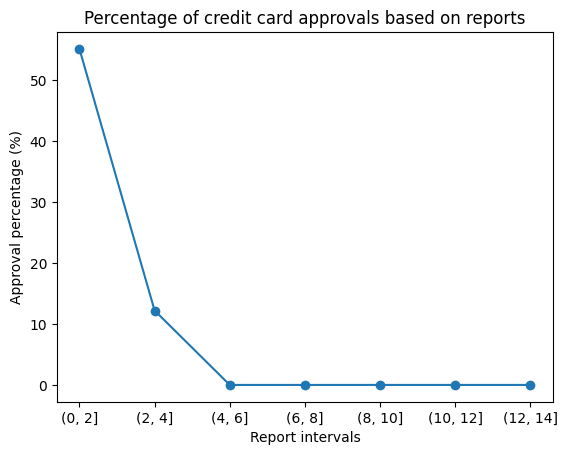

In [ ]:
df_visual['reports_bins'] = pd.cut(df['reports'], bins=[0, 2, 4, 6, 8, 10, 12, 14])

acceptance_rate_by_reports = df_visual.groupby('reports_bins')['card'].mean() * 100

acceptance_rate_by_reports.plot(kind='line', marker='o')
plt.title('Percentage of credit card approvals based on reports')
plt.xlabel('Report intervals')
plt.ylabel('Approval percentage (%)')
plt.show()

<ipython-input-10-51d410c49603>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acceptance_rate_by_share = df_visual.groupby('share_bins')['card'].mean() * 100


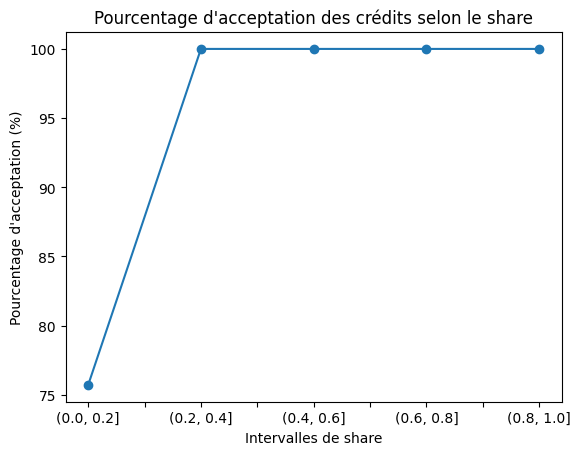

In [ ]:
df_visual['share_bins'] = pd.cut(df['share'], bins=[0, 0.20, 0.40, 0.60, 0.80, 1])

acceptance_rate_by_share = df_visual.groupby('share_bins')['card'].mean() * 100

acceptance_rate_by_share.plot(kind='line', marker='o')
plt.title('Pourcentage d\'acceptation des crédits selon le share')
plt.xlabel('Intervalles de share')
plt.ylabel('Pourcentage d\'acceptation (%)')
plt.show()

In [ ]:
#Q4
X = df.drop("card",axis=1)
y = df["card"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LogisticRegression(max_iter = 500)


In [ ]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

Accuracy: 0.98


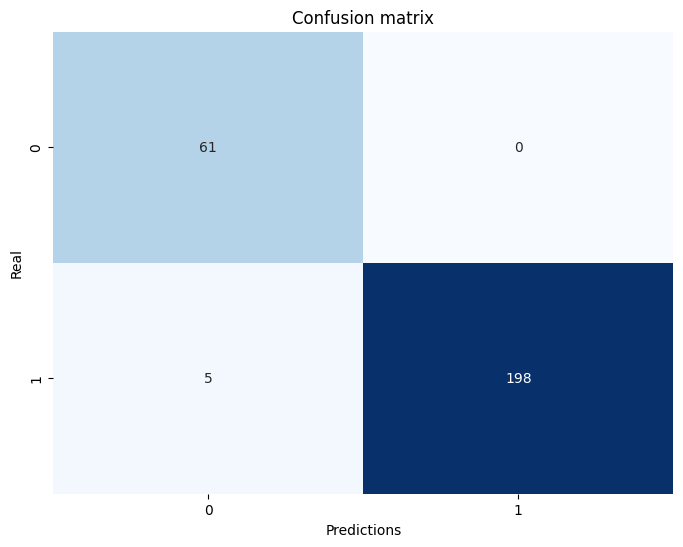

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        61
           1       1.00      0.98      0.99       203

    accuracy                           0.98       264
   macro avg       0.96      0.99      0.97       264
weighted avg       0.98      0.98      0.98       264



In [ ]:
#Q5
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
conf_matrix= confusion_matrix(y_test,y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion matrix')
plt.xlabel('Predictions')
plt.ylabel('Real')
plt.show()

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

In [ ]:
#So we can conclude that that the model performs very well in predicting credit card acceptance, with high precision, recall, and F1-scores for both classes. The accuracy of 98% suggests that the model is reliable for decision-making in credit approvals

In [ ]:
#We use logistic regression rather than linear regression because we are dealing with a classification problem (yes/no) rather than trying to predict a numerical value.